In [17]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt


In [18]:
img=cv2.imread("./images_data/ViratKholi/164.png")
img.shape

(700, 520, 3)

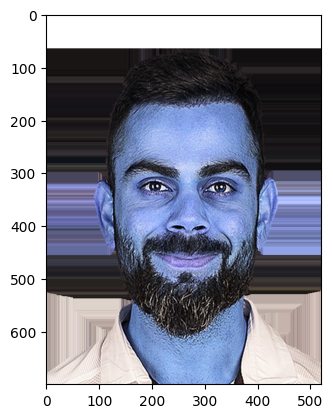

In [19]:
plt.imshow(img)

In [20]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(700, 520)

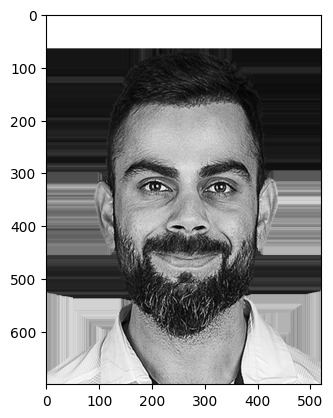

In [21]:
plt.imshow(gray,cmap='gray')

In [23]:
face_cascade=cv2.CascadeClassifier("./opencv/haar/haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("./opencv/haar/haarcascade_eye.xml")

faces=face_cascade.detectMultiScale(gray,1.3,5)

faces

array([[ 86, 178, 362, 362]], dtype=int32)

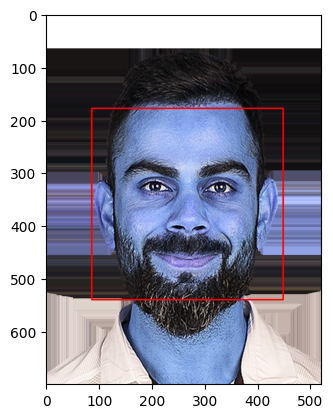

In [24]:
x,y,w,h=faces[0]
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

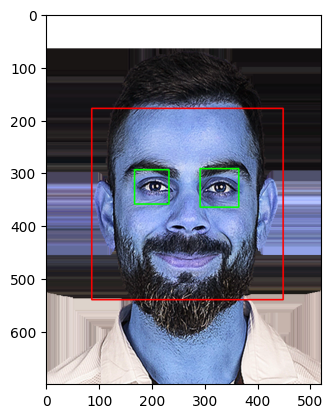

In [25]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

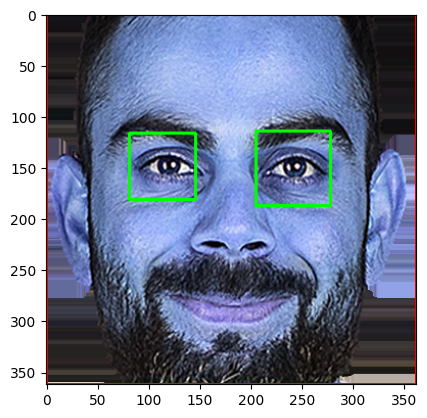

In [26]:
plt.imshow(roi_color,cmap='gray')

In [28]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

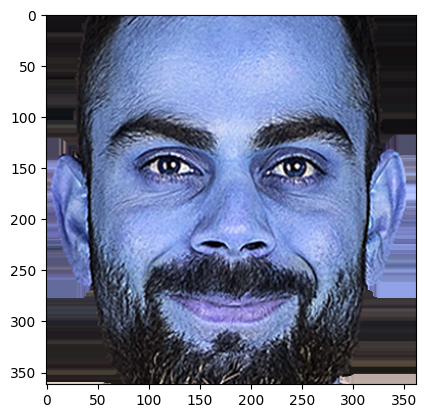

In [29]:
a=get_cropped_image_if_2_eyes("./images_data/ViratKholi/164.png")
plt.imshow(a)

In [31]:
path_to_data = "./images_data/"
path_to_cr_data = "./images_data/cropped/"

In [33]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./images_data/Ronaldo',
 './images_data/pv_sindhu',
 './images_data/ViratKholi',
 './images_data/MSD',
 './images_data/serena_williams']

In [34]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [50]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1] #getting name from the images_data
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        if (entry.path.split('.')[-1])=="jpg" or (entry.path.split('.')[-1])=="jpeg" or (entry.path.split('.')[-1])=="png":
            #print((entry.path.split('.')[-1]))
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)
                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

Generating cropped images in folder:  ./images_data/cropped/Ronaldo
Generating cropped images in folder:  ./images_data/cropped/pv_sindhu
Generating cropped images in folder:  ./images_data/cropped/ViratKholi


libpng warning: iCCP: known incorrect sRGB profile


Generating cropped images in folder:  ./images_data/cropped/MSD


libpng warning: iCCP: known incorrect sRGB profile


Generating cropped images in folder:  ./images_data/cropped/serena_williams


libpng warning: iCCP: known incorrect sRGB profile


In [51]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict


{'Ronaldo': ['./images_data/cropped/Ronaldo/Ronaldo15.png',
  './images_data/cropped/Ronaldo/Ronaldo29.png',
  './images_data/cropped/Ronaldo/Ronaldo28.png',
  './images_data/cropped/Ronaldo/Ronaldo14.png',
  './images_data/cropped/Ronaldo/Ronaldo16.png',
  './images_data/cropped/Ronaldo/Ronaldo17.png',
  './images_data/cropped/Ronaldo/Ronaldo13.png',
  './images_data/cropped/Ronaldo/Ronaldo12.png',
  './images_data/cropped/Ronaldo/Ronaldo38.png',
  './images_data/cropped/Ronaldo/Ronaldo10.png',
  './images_data/cropped/Ronaldo/Ronaldo11.png',
  './images_data/cropped/Ronaldo/Ronaldo39.png',
  './images_data/cropped/Ronaldo/Ronaldo49.png',
  './images_data/cropped/Ronaldo/Ronaldo48.png',
  './images_data/cropped/Ronaldo/Ronaldo9.png',
  './images_data/cropped/Ronaldo/Ronaldo8.png',
  './images_data/cropped/Ronaldo/Ronaldo43.png',
  './images_data/cropped/Ronaldo/Ronaldo6.png',
  './images_data/cropped/Ronaldo/Ronaldo7.png',
  './images_data/cropped/Ronaldo/Ronaldo42.png',
  './images_d

for wavelet transform

In [53]:
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [54]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Ronaldo': 0, 'pv_sindhu': 1, 'ViratKholi': 2, 'MSD': 3, 'serena_williams': 4}

In [57]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        if (training_image.split('.')[-1])=="jpg" or (training_image.split('.')[-1])=="jpeg" or (training_image.split('.')[-1])=="png":
            img = cv2.imread(training_image)
            scalled_raw_img = cv2.resize(img, (32, 32))
            img_har = w2d(img,'db1',5)
            scalled_img_har = cv2.resize(img_har, (32, 32))
            combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
            X.append(combined_img)
            y.append(class_dict[celebrity_name])     

/var/folders/x8/0cf3559138x388gr8s9rqtl80000gn/T/ipykernel_43625/610861574.py:22: RuntimeWarning: invalid value encountered in cast
  imArray_H =  np.uint8(imArray_H)


In [61]:
X[0]

array([[40],
       [19],
       [28],
       ...,
       [ 0],
       [19],
       [ 2]], dtype=uint8)

In [62]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(273, 4096)

# MODEL TRAINING

WILL USE SVM

In [69]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 1))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.7971014492753623

In [72]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.83      0.42      0.56        12
           2       1.00      0.91      0.95        11
           3       0.50      0.73      0.59        11
           4       0.77      0.83      0.80        24

    accuracy                           0.77        69
   macro avg       0.80      0.76      0.76        69
weighted avg       0.80      0.77      0.77        69



In [73]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [79]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,5,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [80]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.749756,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.529390,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.799146,{'logisticregression__C': 1}


In [97]:
sv=SVC(kernel='linear',C=1,gamma='auto',probability=True)
sv.fit(X_train, y_train)
sv.score(X_test, y_test)

0.782608695652174

In [95]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [94]:
best_estimators['svm'].score(X_test,y_test)

0.7971014492753623

In [82]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7246376811594203

In [85]:
best_estimators['random_forest'].score(X_test,y_test)

0.5507246376811594

In [99]:
best_clf=best_estimators['svm']

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[11,  0,  0,  0,  0],
       [ 1,  7,  0,  1,  3],
       [ 0,  0, 11,  0,  0],
       [ 1,  1,  0,  7,  2],
       [ 1,  1,  0,  3, 19]])

Text(95.72222222222221, 0.5, 'Truth')

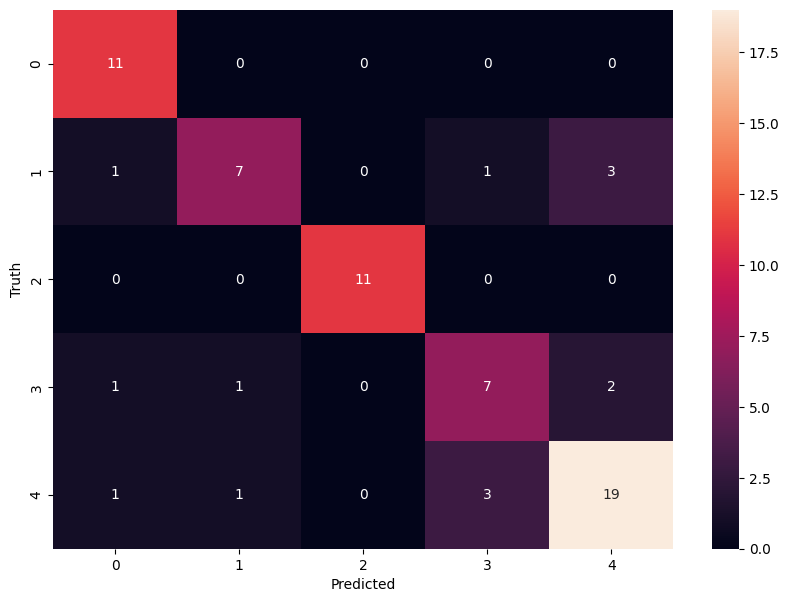

In [101]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [102]:
class_dict

{'Ronaldo': 0, 'pv_sindhu': 1, 'ViratKholi': 2, 'MSD': 3, 'serena_williams': 4}

In [103]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

/Users/arnavgupta/.zshenv:export:1: not valid in this context: /Library/Java/JavaVirtualMachines/jdk-18.0.2.1.jdk/Contents/Home


['saved_model.pkl']

In [104]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))